In [39]:
import os #for file handling
import cv2 #for image processing
import tensorflow as tf #for dl
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting graphs
from emnist import extract_training_samples, extract_test_samples
from keras.layers import LeakyReLU
import warnings
warnings.simplefilter("ignore")

In [2]:
x_train, y_train=extract_training_samples('letters')
x_test, y_test=extract_test_samples('letters')

In [3]:
x_train.shape

(124800, 28, 28)

In [4]:
x_test.shape

(20800, 28, 28)

(28, 28)
V


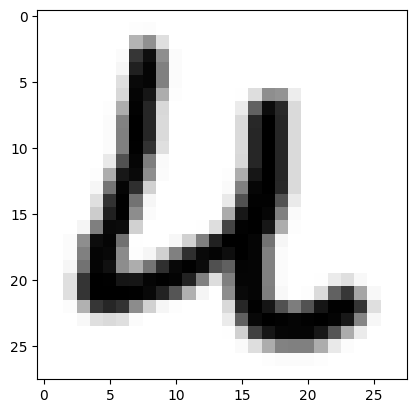

In [6]:
test=16
first_image = x_train[test]
first_result= y_train[test]
print(first_image.shape)

ch = chr(first_result + ord('A'))
print(ch)
plt.imshow(first_image,cmap=plt.cm.binary)
plt.show()


In [7]:
x_train = x_train / 255.0  # Scale pixel values to [0, 1]
x_test = x_test / 255.0

In [8]:
# Preprocess the labels to convert them to integers
y_train = y_train - 1  # EMNIST labels start from 1, subtract 1 to make them start from 0
y_test = y_test - 1

In [53]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(62, activation="softmax"))

In [54]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [55]:
#fitting the model
model.fit(x_train,y_train,epochs=12)

Epoch 1/12
3900/3900 [==============================] - 44s 11ms/step - loss: 0.6913 - accuracy: 0.7882
Epoch 2/12
3900/3900 [==============================] - 41s 10ms/step - loss: 0.4023 - accuracy: 0.8786
Epoch 3/12
3900/3900 [==============================] - 41s 10ms/step - loss: 0.3348 - accuracy: 0.8966
Epoch 4/12
3900/3900 [==============================] - 41s 11ms/step - loss: 0.2972 - accuracy: 0.9082
Epoch 5/12
3900/3900 [==============================] - 41s 11ms/step - loss: 0.2718 - accuracy: 0.9155
Epoch 6/12
3900/3900 [==============================] - 42s 11ms/step - loss: 0.2499 - accuracy: 0.9221
Epoch 7/12
3900/3900 [==============================] - 42s 11ms/step - loss: 0.2339 - accuracy: 0.9262
Epoch 8/12
3900/3900 [==============================] - 41s 11ms/step - loss: 0.2204 - accuracy: 0.9300
Epoch 9/12
3900/3900 [==============================] - 41s 10ms/step - loss: 0.2087 - accuracy: 0.9333
Epoch 10/12
3900/3900 [==============================] - 41s 11m

In [56]:
model.save('alphabets.model')

INFO:tensorflow:Assets written to: alphabets.model\assets


INFO:tensorflow:Assets written to: alphabets.model\assets


650/650 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.9075
38.969048857688904
90.75480699539185


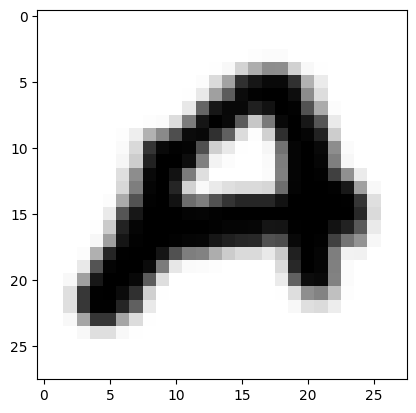

In [61]:
#evaluating the model
loss,accuracy=model.evaluate(x_test,y_test)
print(loss*100)
print(accuracy*100)
plt.imshow(x_test[5],cmap=plt.cm.binary)
plt.show()


1/1 [==============================] - 0s 56ms/step
				  The letter is probably:
						' A '


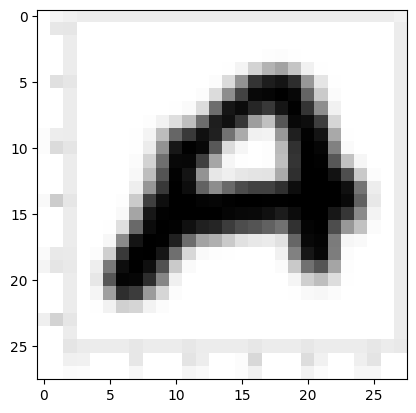

In [62]:
#load and use the model
model=tf.keras.models.load_model('alphabets.model')

#loading the image
img=cv2.imread(f"alphabets/test.png")[:,:,0]

#inverting the image
img=np.invert(np.array([img]))

#make prediction
prediction=model.predict(img)

cs=''
#determine the label
predicted_label = np.argmax(prediction)
recognized_character = chr(predicted_label + ord('A'))
print("\t\t\t\t  The letter is probably:\n\t\t\t\t\t\t'",recognized_character,"'")
plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()
